Lots of buzzwords floating around here: **figures**, **axes**, **subplots**, and probably a couple hundred more.

Get pumped!! Get excited!! **We're going to crush the mystery around how pandas uses matplotlib!**

## Our data

We're going to be working with [OECD data](https://data.oecd.org/), specifically [unemployment](https://data.oecd.org/unemp/unemployment-rate.htm) from 1980 to the present for Japan, Australia, USA, and Germany. I've edited the data so it looks a little cleaner and is a little easier to work with.

In [2]:
%matplotlib inline
import pandas as pd
df = pd.read_csv("unemployment.csv")
df.head(3)

,country,year,unemployment
0,Australia,1980,6.106246
1,Australia,1981,5.783571
2,Australia,1982,7.156132


## Appearance of the mysterious variable `ax`

Let's say we try to plot a line for **each country** over time. We'll `groupby` country and give it some axes, and cry about the result.

country
Australia    Axes(0.125,0.125;0.775x0.775)
Germany      Axes(0.125,0.125;0.775x0.775)
Japan        Axes(0.125,0.125;0.775x0.775)
USA          Axes(0.125,0.125;0.775x0.775)
dtype: object

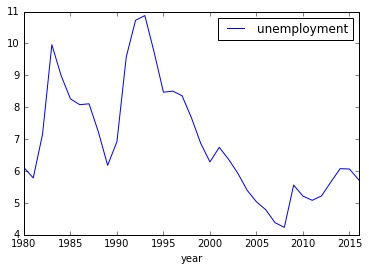

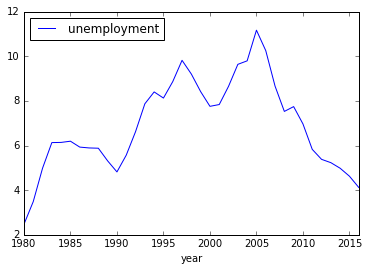

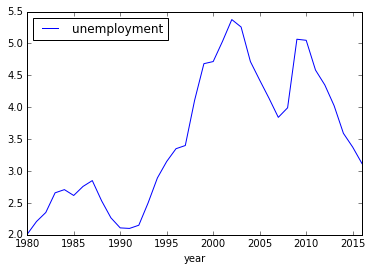

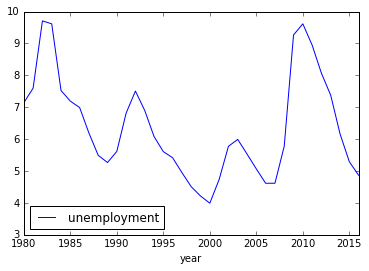

In [3]:
df.groupby('country').plot(x='year', y='unemployment')

So many charts! I've already told you how to fix it, although I didn't explain it. It goes like this:

country
Australia    Axes(0.125,0.125;0.775x0.775)
Germany      Axes(0.125,0.125;0.775x0.775)
Japan        Axes(0.125,0.125;0.775x0.775)
USA          Axes(0.125,0.125;0.775x0.775)
dtype: object

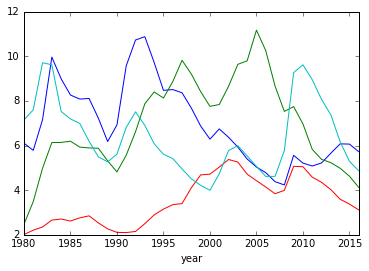

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)

## Explaining `fig, ax=plt.subplots`


### `plt` is PYPLOT

```python
fig, ax = plt.subplots()
```

`pyplot` is matplotlib's [graphing framework](https://matplotlib.org/api/pyplot_api.html). It's kind of based on the programming language/environment MATLAB (which you've hopefully never heard of) but also kind of *not* based on MATLAB. This quasi-dichotomy is where all our troubles will come from.

But what's it really do? All you need to know is it's the graph-y and math-y parts of matplotlib and you might as well think of it as matplotlib itself. It does everything important.

When you import `pyplot`, you traditionally rename it as `plt` because programming are too lazy to type more letters than that. If you're making a list of everything you should always import when you start a new project, it's probably a good one.

```python
import matplotlib.pyplot as plt
```

> We're going to skip to `fig` - we'll talk subplots later!

### `fig` is the FIGURE

```python
fig, ax = plt.subplots()
```

First, we'll start with **`fig`**. `fig` means **figure**, and it's your entire graphic. You've actually seen it before, when doing things like `figsize=(x,y)`...

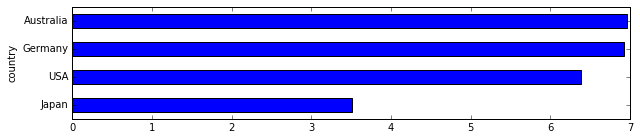

In [13]:
df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', figsize=(10,2))

It's the whole image, the whole shebang, all 10x2 of it.

The weird part is, though, *your actual graph is not the figure*. The figure is the part *around* your graph. Your chart sits on **top** of the figure. So what's your visualization?

Your graph is what's called a **subplot** or **axis**. Or, technically, an **AxesSubplot**.

Let's talk about that.

## ax is the AXIS or SUBPLOT

```python
fig, ax = plt.subplots()
```

When we think about axes, we think about them as the lines on the left and right of our graphs. **STOP DOING THAT RIGHT NOW** or you're going to get confused! In this case, an axis - or an `ax`, and we'll call it - is **an entire graph**.

```python
df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
```

When we pass `ax=ax` to our plot, we're saying "hey, we already have a graph made up! Please just use it instead" and then pandas/matplotlib does, instead of using a brand-new image for each.

So what's the difference between a figure and an axis/subplot? That's easy - **figures are made up of subplots.** Figures are the table that the dinner plates of subplots go on. So far we've only seen them made up of just one, but we can do more!

We'll start by doing the **long-hand version** of what we just did.

country
Australia    Axes(0.125,0.125;0.775x0.775)
Germany      Axes(0.125,0.125;0.775x0.775)
Japan        Axes(0.125,0.125;0.775x0.775)
USA          Axes(0.125,0.125;0.775x0.775)
dtype: object

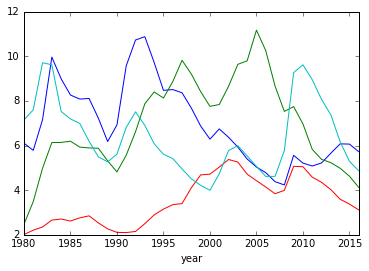

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)

Let's break it down piece by piece. First, we create a new figure. That's our canvas we'll put our charts on.

```python
fig = plt.figure()
```

Then we say hey, add a subplot in there - an actual graph! We'll talk about the numbers in a second.

```python
ax = fig.add_subplot(111)
```

And finally we give it to pandas to draw inside of so it doesn't make a new axis/subplot each time.

```python
df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
```

But what's the `.add_subplot(111)` thing? It means, "figure, please build a 1x1 grid and put me in the first section."

> If we want to get picky, it's actually a shorthand version of `.add_subplot(1,1,1)`. You don't normally have that many subplots, though, so most people use the shorthand.

By adjusting the numbers, we can actually add *multiple subplots*. Let's create a 2x1 grid and put something in the first subplot and something in the second subplot.

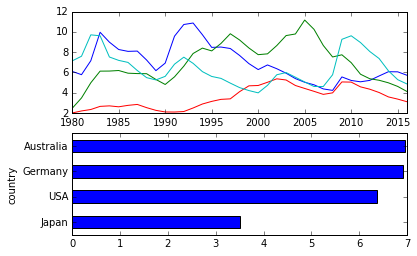

In [21]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

Why does 2x1 give you two TALL and one WIDE? I don't know, it doesn't make sense at all, but it's how life is. We could change the numbers to be `121` and `122` - "build a 1x2 grid, and give me the 1st and 2nd spaces"

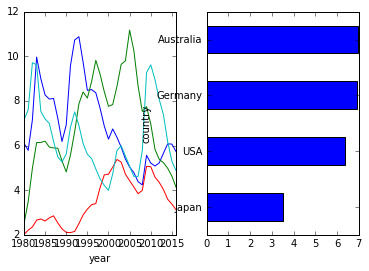

In [23]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

Yes, yes, it doesn't always look nice. What about a 2x2 grid, and we only take up the 1st and 4th boxes?

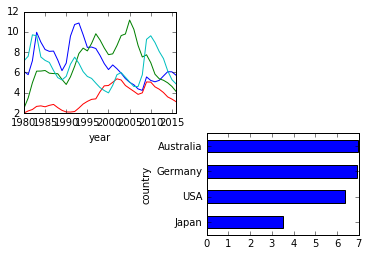

In [26]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(224)

df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

If we get tired of doing the `221` style shorthand, we could break it out into separate elements (height, width, box number), and **then ask for multiple boxes**. Down below we'll build a 2x2 square and put the first graph into the first AND second boxes, and then stick the poor second graph into the fourth box.

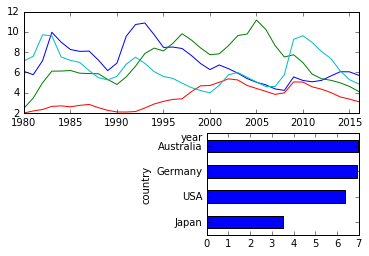

In [30]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(2, 2, (1,2))

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(224)

df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

## Doing it all at once

Normally you don't use `add_subplot`. Why? I don't know, people are lazy. They like to do it all at once. That's why `plt.subplots()` exists.

When you do `plt.subplots()`, you get back the figure and any axes you created. Below we've made a 2x1 grid, and the axes split it evenly.

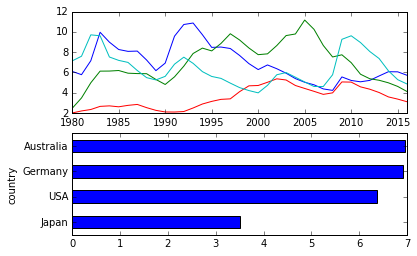

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1)

df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

We could do the same thing side-by-side instead of top-to-bottom

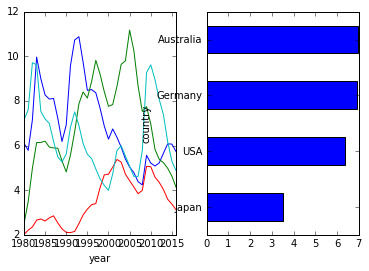

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)

df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

You can also give them a little more space to breathe and clean them up a bit.

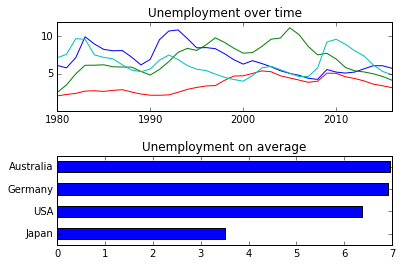

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1)

df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
ax1.set_ylim((0,12))
ax1.yaxis.set_ticks([5, 10])
ax1.xaxis.set_ticks([1980,1990, 2000, 2010])
ax1.xaxis.set_label_text("")
ax1.set_title("Unemployment over time")

df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)
ax2.yaxis.set_label_text("")
ax2.set_title("Unemployment on average")
fig.subplots_adjust(hspace=0.5)

Not that these charts make *sense*, but at least you now know a little more about figures, axes and subplots.